# 📊 Data Science Assignment – Web3 Trading Team

This notebook explores the relationship between **trader behavior** and **market sentiment (Fear vs Greed)**.

Dataset links are provided via Google Drive and are loaded directly.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create necessary folders
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

## 📂 Step 1: Load Datasets

In [ ]:
trader_data_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

# Read CSVs
trader_df = pd.read_csv(trader_data_url)
sentiment_df = pd.read_csv(sentiment_url)

print("Sentiment Dataset Preview:")
print(sentiment_df.head())
print("\nColumns:", sentiment_df.columns.tolist())

print("\nTrader Dataset Preview:")
print(trader_df.head())
print("\nColumns:", trader_df.columns.tolist())


Sentiment Dataset Preview:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Columns: ['timestamp', 'value', 'classification', 'date']

Trader Dataset Preview:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00

## ⚙️ Step 2: Preprocessing

In [ ]:
print("Sentiment dataset columns:", sentiment_df.columns.tolist())
print("Trader dataset columns:", trader_df.columns.tolist())

Sentiment dataset columns: ['timestamp', 'value', 'classification', 'date']
Trader dataset columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [ ]:
# Convert dates to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

# Extract only date (ignore time part)
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# Merge datasets
merged_df = pd.merge(trader_df, sentiment_df, on='date_only', how='left')

print("Merged Data:")
print(merged_df.head())

Merged Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0

## 📊 Step 3: Exploratory Data Analysis (EDA)

Merged dataframe columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date_only', 'timestamp', 'value', 'classification', 'date'] 

Detected columns:
 classification: classification
 date: date_only
 size/volume: Size USD
 price: Execution Price
 pnl: Closed PnL
 leverage: None
 side: Side
 account: Account

Skipping leverage boxplot (no leverage or no classification column detected).

Average PnL by sentiment:
 __sentiment
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.297201
Greed             53.992785
Neutral           27.088803
nan               38.049605
Name: avg_pnl, dtype: float64 



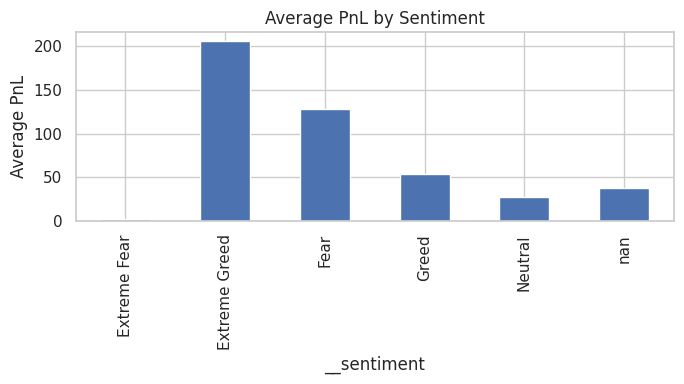

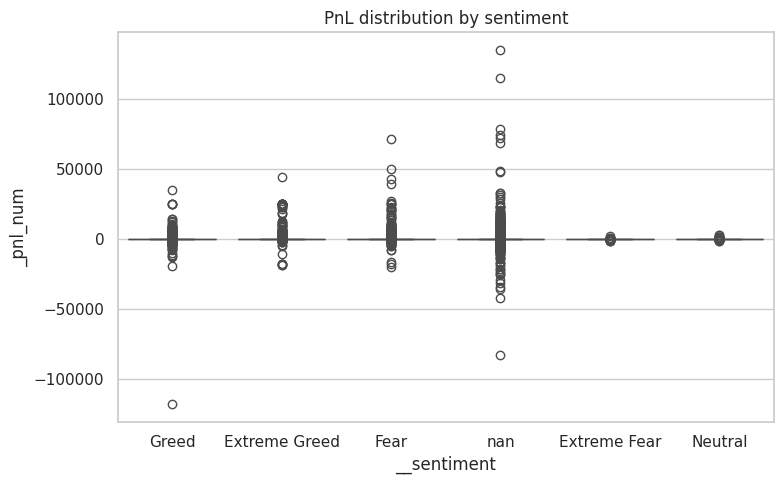


Total trade volume (size) by sentiment:
 __sentiment
Extreme Fear     9.580240e+06
Extreme Greed    1.822376e+07
Fear             7.967439e+07
Greed            5.704582e+07
Neutral          1.193955e+07
nan              1.014724e+09
Name: total_volume, dtype: float64 



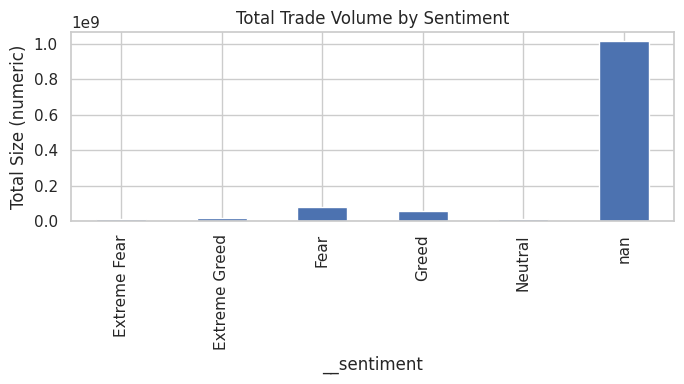


Trade counts by sentiment and side:
 Side             BUY   SELL
__sentiment                
Extreme Fear    1168   1158
Extreme Greed   1661   3960
Fear            7307   6562
Greed           5407   5885
Neutral         1020   1736
nan            86133  89227 



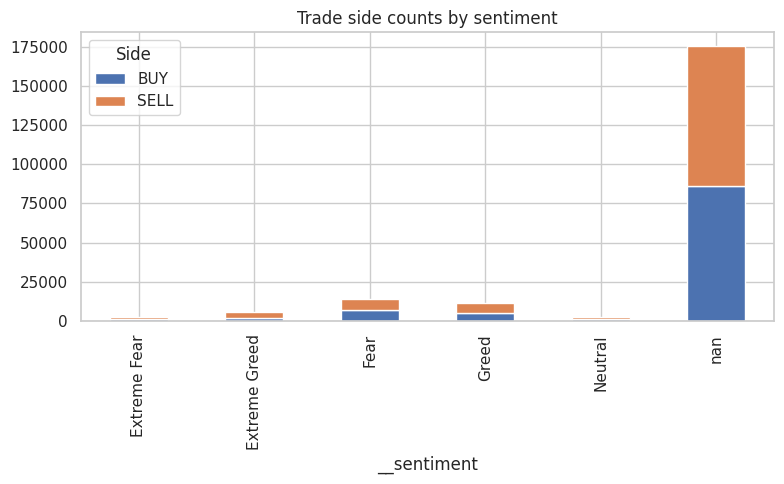


Time series (daily) sample:
              total_size     avg_pnl  avg_leverage  trades
date_only                                                
2025-11-04  11319327.07  115.334379           NaN    1096
2025-12-01   2258459.17    9.538608           NaN     602
2025-12-02   4143974.54   19.251828           NaN    1031
2025-12-03  18618139.15   72.607355           NaN    3968
2025-12-04  55914617.49  194.603933           NaN    2109 



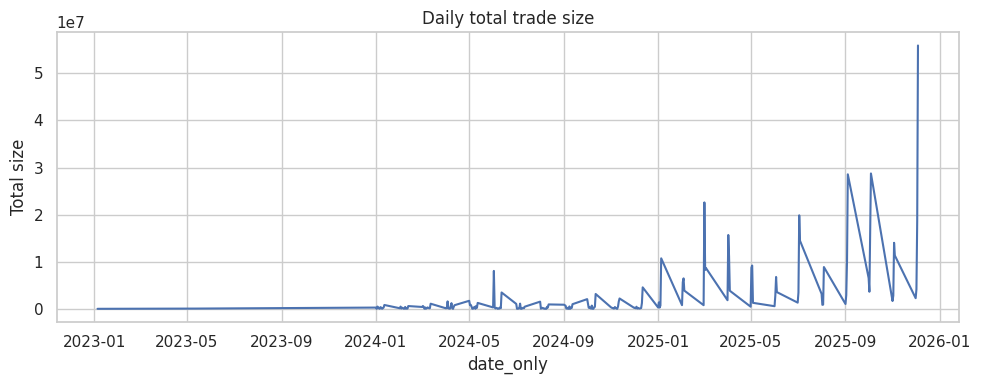

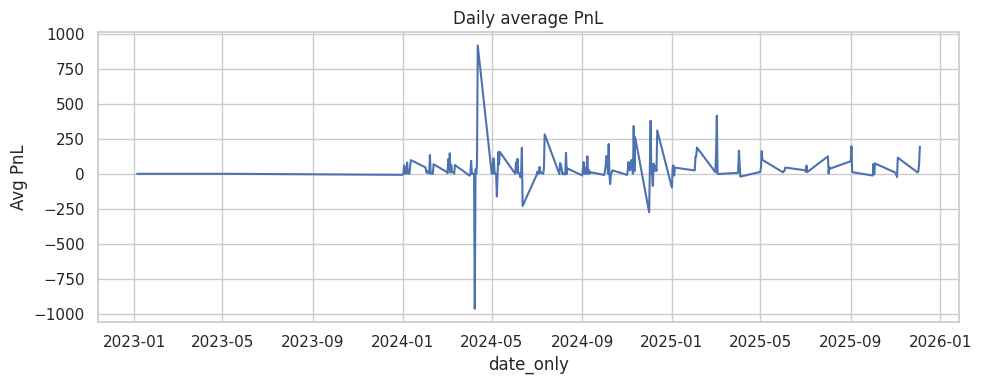


Correlation matrix among: ['_pnl_num', '_size_num', '_price_num'] 
             _pnl_num  _size_num  _price_num
_pnl_num    1.000000   0.123589   -0.006507
_size_num   0.123589   1.000000    0.189851
_price_num -0.006507   0.189851    1.000000 



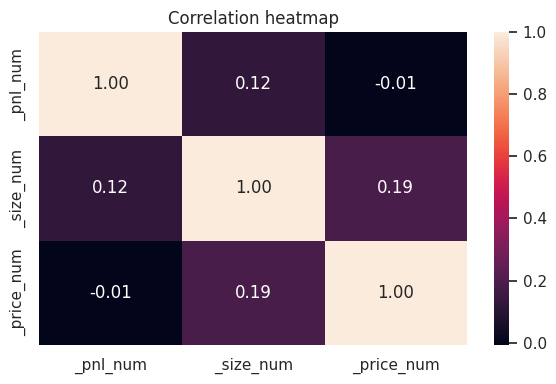


EDA finished. Plots saved into the 'outputs/' folder (if generated).


In [8]:
# ============ Robust EDA (paste into a new Colab cell) ============
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # Import pandas

# Define URLs and load dataframes
trader_data_url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
sentiment_url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

trader_df = pd.read_csv(trader_data_url)
sentiment_df = pd.read_csv(sentiment_url)

# Convert dates to datetime format and extract date only
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# Merge datasets
merged_df = pd.merge(trader_df, sentiment_df, on='date_only', how='left')


# Show columns (quick check)
print("Merged dataframe columns:\n", merged_df.columns.tolist(), "\n")

# Helper to find a column by keywords (returns first good match or None)
def find_col(df, keywords):
    lowcols = {c.lower(): c for c in df.columns}
    for kw in keywords:
        for lc, orig in lowcols.items():
            if kw in lc:
                return orig
    return None

# Find likely columns (common names)
classification_col = find_col(merged_df, ['classification', 'class', 'sentiment'])
date_col = find_col(merged_df, ['date_only', 'date', 'timestamp'])
size_col = find_col(merged_df, ['size usd', 'size_usd', 'size tokens', 'size', 'volume', 'amount', 'sizeusd'])
price_col = find_col(merged_df, ['execution price', 'execution_price', 'price'])
pnl_col = find_col(merged_df, ['closedpnl', 'closed_pnl', 'pnl', 'pl', 'profit'])
leverage_col = find_col(merged_df, ['leverage', 'lev'])
side_col = find_col(merged_df, ['side'])
account_col = find_col(merged_df, ['account', 'acct', 'wallet'])

print("Detected columns:")
print(" classification:", classification_col)
print(" date:", date_col)
print(" size/volume:", size_col)
print(" price:", price_col)
print(" pnl:", pnl_col)
print(" leverage:", leverage_col)
print(" side:", side_col)
print(" account:", account_col)
print()

# Utility to clean numeric-like columns (remove commas, currency signs, then convert)
def to_numeric_safe(series):
    s = series.astype(str).str.replace(r'[^0-9\.\-]', '', regex=True)
    return pd.to_numeric(s, errors='coerce')

# Clean / convert columns if found
if size_col:
    merged_df['_size_num'] = to_numeric_safe(merged_df[size_col])
else:
    merged_df['_size_num'] = np.nan

if price_col:
    merged_df['_price_num'] = to_numeric_safe(merged_df[price_col])
else:
    merged_df['_price_num'] = np.nan

if pnl_col:
    merged_df['_pnl_num'] = to_numeric_safe(merged_df[pnl_col])
else:
    merged_df['_pnl_num'] = np.nan

if leverage_col:
    merged_df['_lev_num'] = to_numeric_safe(merged_df[leverage_col])
else:
    merged_df['_lev_num'] = np.nan

# Ensure classification exists
if classification_col is None:
    print("WARNING: Could not detect a 'classification' column. EDA by sentiment will be skipped.\n")
else:
    merged_df['__sentiment'] = merged_df[classification_col].astype(str)

# Create outputs folder if not exists (should already exist)
import os
os.makedirs("outputs", exist_ok=True)

sns.set(style="whitegrid")

# ---- 1) Boxplot: leverage by sentiment (if leverage present) ----
if leverage_col and classification_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='__sentiment', y='_lev_num', data=merged_df)
    plt.title("Leverage distribution by sentiment")
    plt.ylabel(leverage_col)
    plt.xlabel("Sentiment")
    plt.tight_layout()
    plt.savefig("outputs/leverage_by_sentiment.png")
    plt.show()
else:
    print("Skipping leverage boxplot (no leverage or no classification column detected).")

# ---- 2) PnL analysis: avg & boxplot (if pnl present) ----
if pnl_col and classification_col:
    avg_pnl = merged_df.groupby('__sentiment')['_pnl_num'].mean().rename("avg_pnl")
    print("\nAverage PnL by sentiment:\n", avg_pnl, "\n")
    plt.figure(figsize=(7,4))
    avg_pnl.plot(kind='bar')
    plt.title("Average PnL by Sentiment")
    plt.ylabel("Average PnL")
    plt.tight_layout()
    plt.savefig("outputs/avg_pnl_by_sentiment.png")
    plt.show()

    plt.figure(figsize=(8,5))
    sns.boxplot(x='__sentiment', y='_pnl_num', data=merged_df)
    plt.title("PnL distribution by sentiment")
    plt.tight_layout()
    plt.savefig("outputs/pnl_boxplot_by_sentiment.png")
    plt.show()
else:
    print("Skipping PnL analysis (no PnL column or no classification column detected).")

# ---- 3) Volume/Size comparison ----
if not merged_df['_size_num'].isna().all() and classification_col:
    total_volume = merged_df.groupby('__sentiment')['_size_num'].sum().rename("total_volume")
    print("\nTotal trade volume (size) by sentiment:\n", total_volume, "\n")
    plt.figure(figsize=(7,4))
    total_volume.plot(kind='bar')
    plt.title("Total Trade Volume by Sentiment")
    plt.ylabel("Total Size (numeric)")
    plt.tight_layout()
    plt.savefig("outputs/total_volume_by_sentiment.png")
    plt.show()
else:
    print("Skipping volume plots (no size/volume column found or no classification).")

# ---- 4) Side (Long/Short) behaviour ----
if side_col and classification_col:
    ct = pd.crosstab(merged_df['__sentiment'], merged_df[side_col])
    print("\nTrade counts by sentiment and side:\n", ct, "\n")
    ct.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title("Trade side counts by sentiment")
    plt.tight_layout()
    plt.savefig("outputs/side_counts_by_sentiment.png")
    plt.show()
else:
    print("Skipping side analysis (no 'Side' or no classification).")

# ---- 5) Time series: daily totals (size, avg pnl, avg leverage) ----
if date_col:
    # ensure a usable date column exists
    if 'date_only' in merged_df.columns:
        ts_index = 'date_only'
    else:
        # fallback: try to convert the date_col into a date-only column
        merged_df['_tmp_date'] = pd.to_datetime(merged_df[date_col], errors='coerce').dt.date
        ts_index = '_tmp_date'

    agg = merged_df.groupby(ts_index).agg(
        total_size = ('_size_num', 'sum'),
        avg_pnl = ('_pnl_num', 'mean'),
        avg_leverage = ('_lev_num', 'mean'),
        trades = (account_col if account_col else (merged_df.columns[0]), 'count')
    )
    print("\nTime series (daily) sample:\n", agg.tail(), "\n")

    # plot daily total size
    if not agg['total_size'].isna().all():
        plt.figure(figsize=(10,4))
        agg['total_size'].plot()
        plt.title("Daily total trade size")
        plt.ylabel("Total size")
        plt.tight_layout()
        plt.savefig("outputs/daily_total_size.png")
        plt.show()

    # plot avg pnl (if available)
    if not agg['avg_pnl'].isna().all():
        plt.figure(figsize=(10,4))
        agg['avg_pnl'].plot()
        plt.title("Daily average PnL")
        plt.ylabel("Avg PnL")
        plt.tight_layout()
        plt.savefig("outputs/daily_avg_pnl.png")
        plt.show()

    # plot avg leverage (if available)
    if not agg['avg_leverage'].isna().all():
        plt.figure(figsize=(10,4))
        agg['avg_leverage'].plot()
        plt.title("Daily average leverage")
        plt.ylabel("Avg leverage")
        plt.tight_layout()
        plt.savefig("outputs/daily_avg_leverage.png")
        plt.show()
else:
    print("Skipping time-series (no date column detected).")

# ---- 6) Correlation heatmap (for numeric metrics present) ----
corr_cols = []
for col in ['_pnl_num', '_size_num', '_lev_num', '_price_num']:
    if col in merged_df.columns and not merged_df[col].isna().all():
        corr_cols.append(col)

if len(corr_cols) >= 2:
    corr_df = merged_df[corr_cols].corr()
    print("\nCorrelation matrix among:", corr_cols, "\n", corr_df, "\n")
    plt.figure(figsize=(6,4))
    sns.heatmap(corr_df, annot=True, fmt=".2f")
    plt.title("Correlation heatmap")
    plt.tight_layout()
    plt.savefig("outputs/correlation_heatmap.png")
    plt.show()
else:
    print("Skipping correlation heatmap (not enough numeric columns found).")

print("\nEDA finished. Plots saved into the 'outputs/' folder (if generated).")
# ===================================================================

## 🔗 Step 4: Correlation Analysis

In [9]:
# The correlation analysis is now included in the EDA cell.

In [10]:
from google.colab import files
import shutil
shutil.make_archive("outputs","zip","outputs")
files.download("outputs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import os

# Make sure the folder exists
os.makedirs("csv_files", exist_ok=True)

# Save merged dataset into csv_files
merged_df.to_csv("csv_files/merged_trader_sentiment.csv", index=False)

print("✅ Merged dataset saved in csv_files/merged_trader_sentiment.csv")

✅ Merged dataset saved in csv_files/merged_trader_sentiment.csv


## 📝 Step 5: Insights

Write your observations here:
- How does leverage differ between Fear vs Greed?
- Is PnL better or worse during Fear?
- Do traders take bigger risks during Greed periods?
